Data Science for Humanities 2

## Session: Networks
Summer term 23
Prof. Goran Glavaš, Lennart Keller

### Why study networks?

Networks are ubiquitous.

In our everyday life:

- Relationships
- Internet
- Social media
- Traffic routes

In the humanities:

- Character co-occurrence networks
- correspondence networks
- editions
- ...

Example: Character networks in German Dramas

Character co-occurrence networks for 465 German plays.

Quelle: Fischer, Frank; Kittel, Christopher; Trilcke, Peer; Göbel, Mathias; Vogel, Andreas; Meiners, Hanna-Lena; Kampkaspar, Dario (2016): Distant Reading Showcase – 465 German Dramas – A DHd2016 Poster

High-Res-Version: https://dlina.github.io/Distant-Reading-Showcase-Poster-DHd2016-Leipzig/

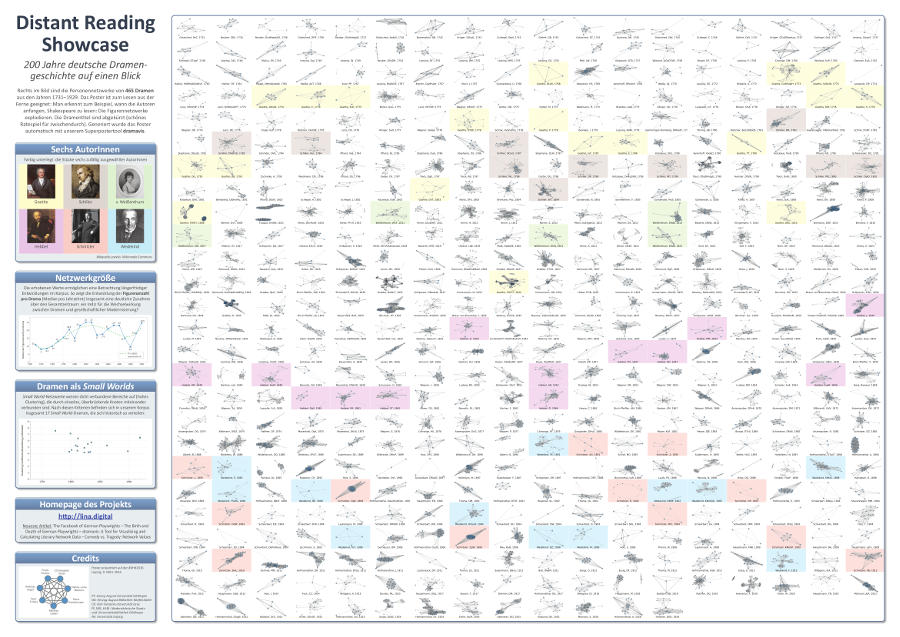

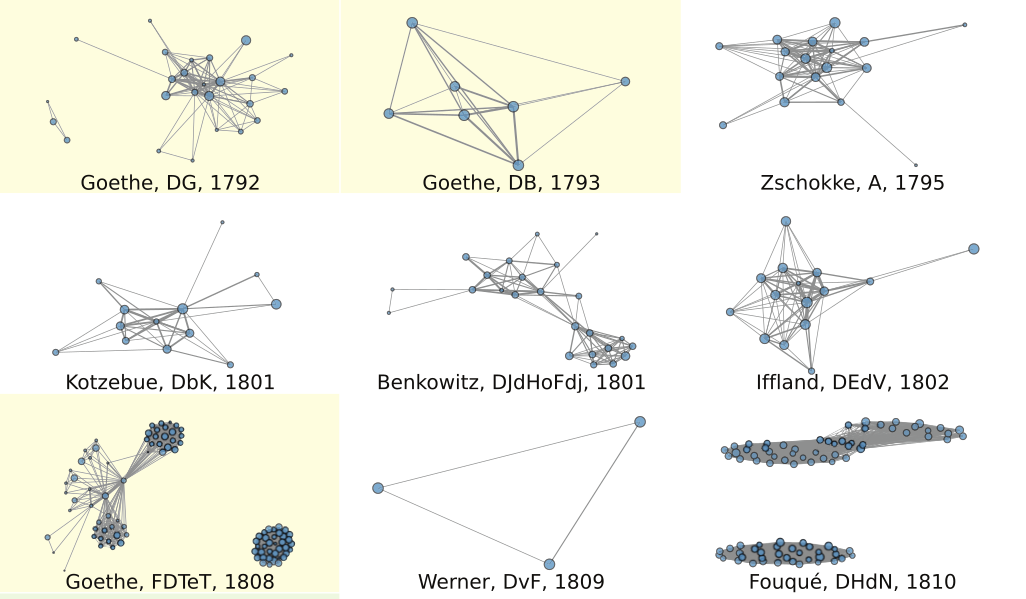

Example: Relationships among German nobles during the Middle Ages
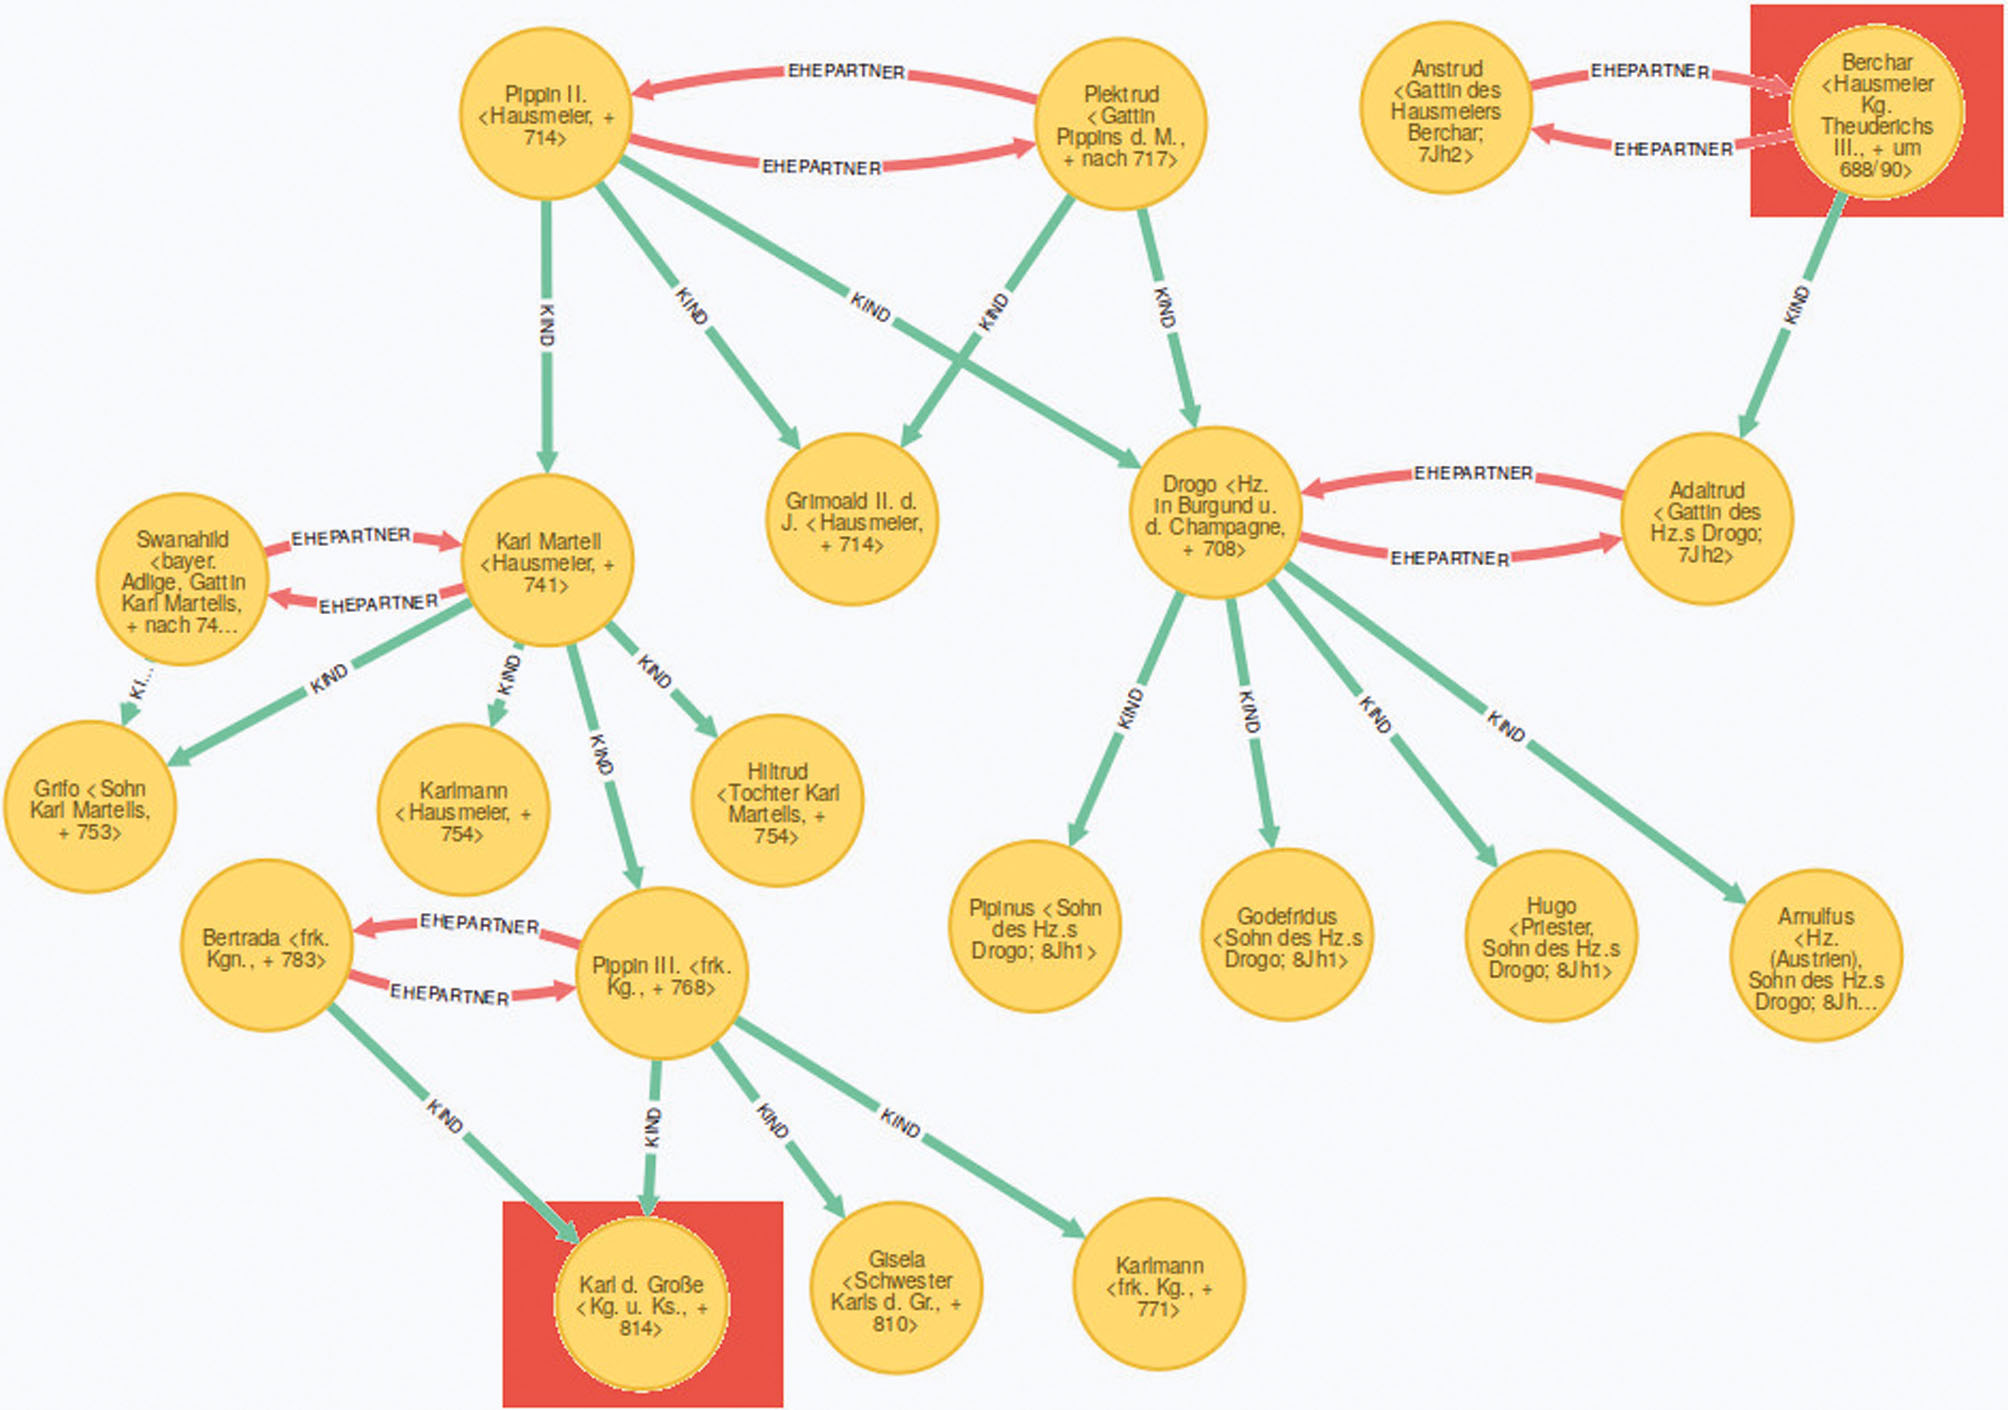

Example: Digital Editions
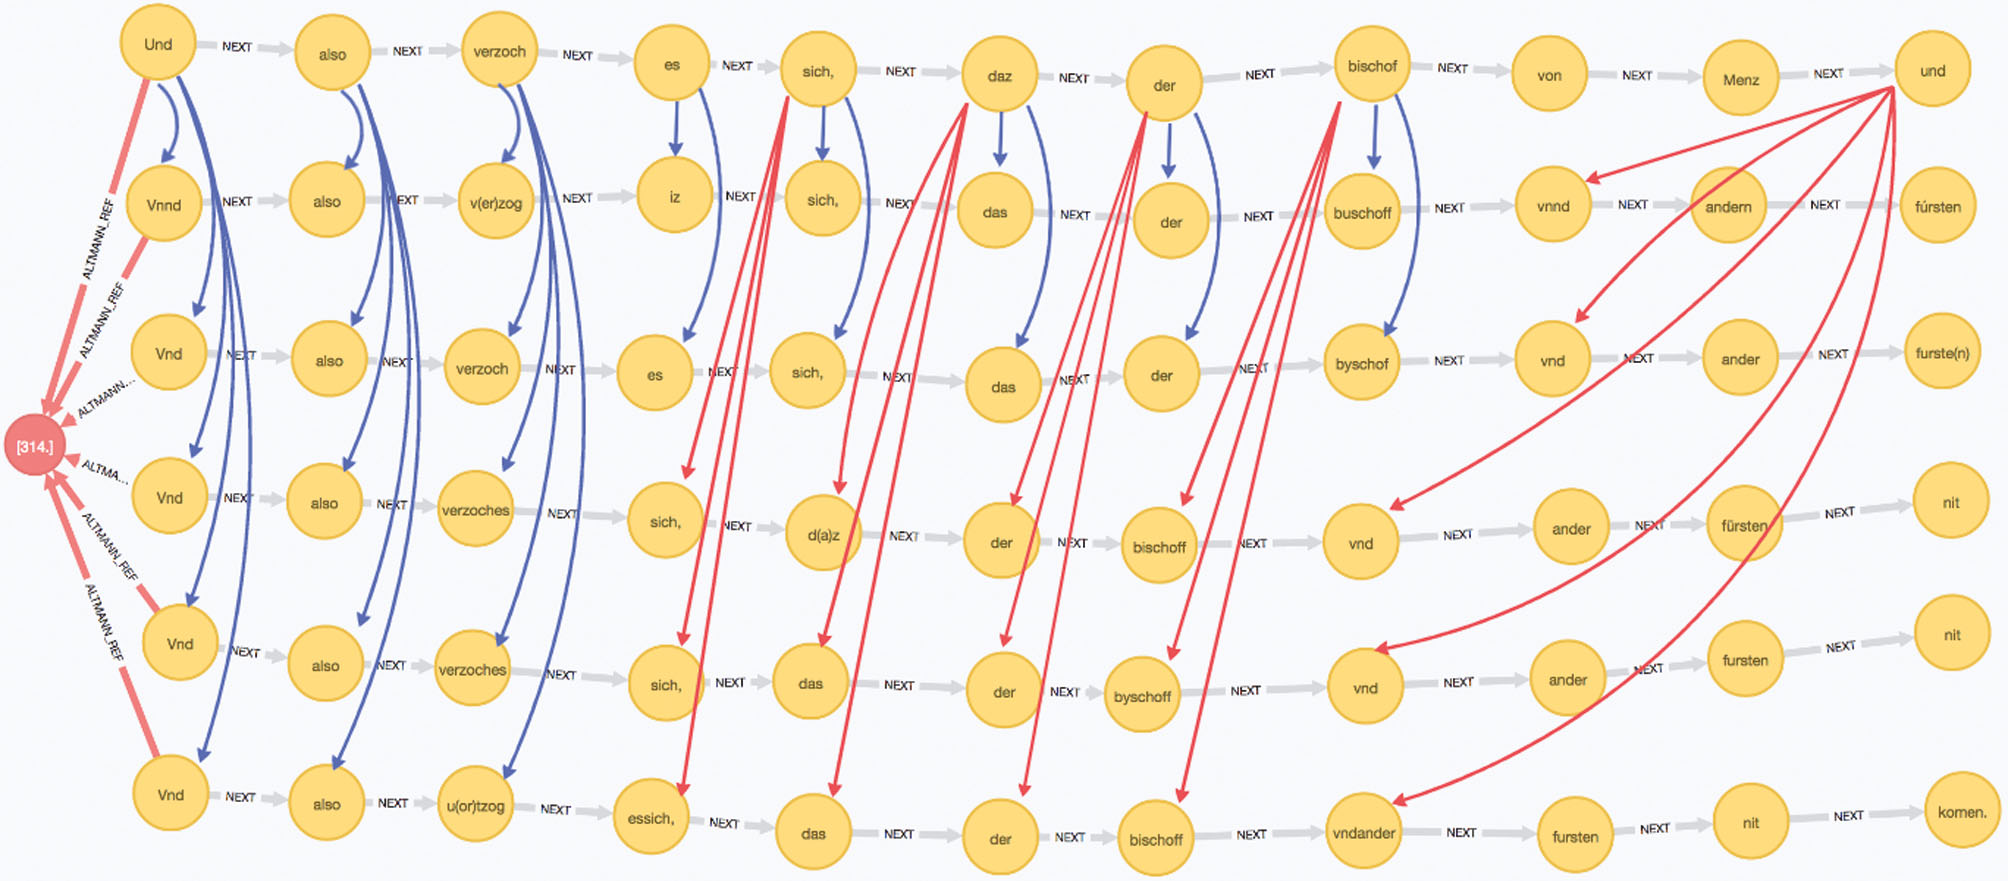

### Graphs: Describing networks formally

When speaking of networks in Data Science or Math, we generally refer to them as graphs.

A graph is a simple structure comprising two properties

- A set of nodes (sometimes called vertices[dt. Eckpunkte]) V={A,B,E}
- A collection of edges that connect two dots: E⊆V×V, E:={(A,A),(A,B),(B,A),(B,B),(E,A),(E,B),(E,E)}

G=(V,E)

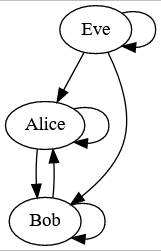

### Undirected graphs

An edge in an undirected graph describes a symmetrical relation between any two nodes ((u,v)∈E⟺(v,u)∈E).

- Edges are sets: {u,v}∈E oder uv

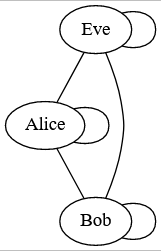

### Reflexives graphs

Graphs that allow nodes to have an edge to themselves.


### Weighted Graphs

In general, we can assign properties to nodes or edges.

The most common form if graphs including additional properties is a weighted graph.

A weighted graph G=(V,E,γ)
additionally contains function γ:E→R that assigns each edge a weight.

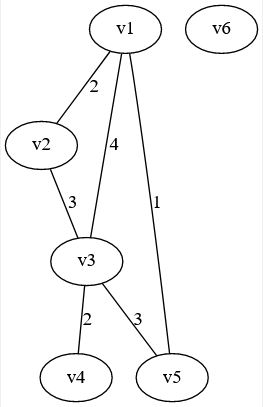

### Graphs: Basics

**Walk**

A Walk is eine finite sequence v0e1v1e2v2…envn
such that {vi−1,vi}=ei∈E for all i with 0<i≤n

**Trail**

A trail is walk in which all edges are distinct.

**Path**

A path is a trail in which all nodes are distinct

**Cycle**

A cycle is a trail that starts and ends in the same node.

=> During a cycle no node is visited twice, otherwise it's a circuit.


### Graph: Representations

Question: How do we model a graph computationally?

#### Adjacency list

A graph G is represented as a list containing all nodes, and each entry in the list points to the node's neighbors.

In Python, we can use a dictionary instead of a list to store all nodes:

In [ ]:
adjacency_list = {
    "v1": ["v2", "v3", "v5"],
    "v2": ["v1", "v3"],
    "v3": ["v1", "v2", "v4", "v5"],
    "v4": ["v3"],
    "v5": ["v1", "v3", "v5"],
    "v6": [],
}

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph 

from IPython.display import Image, display

# Just a little helper function to plot graphs, see section on NetworkX below for further information.
def plot_graph(graph):
    # Detect weights for edges and set them as labels
    has_weights = False
    if any(map(lambda edge: "weight" in graph.edges[edge], graph.edges)):
        for edge in graph.edges:
            edge_attrs = graph.edges[edge]
            weight = edge_attrs.get("weight", None)
            edge_attrs["label"] = weight
            has_weights = True
    
    # First, try graphviz backup as it produces cleaner plots
    # It requires both 'graphviz' and 'pygraphviz' installed.
    try:
        a = to_agraph(graph)
        a.layout('dot') 
        return display(Image(a.draw(format="png")))
    # Fallback to matplotlib backend if graphviz isn't accessible.
    except Exception:
        
        fig, ax = plt.subplots()
        pos=nx.spring_layout(graph)
        nx.draw_networkx(graph, pos=pos, ax=ax)
        if has_weights:
            labels = nx.get_edge_attributes(graph,'weight')
            nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=labels, ax=ax)
        fig.tight_layout()
        plt.show()

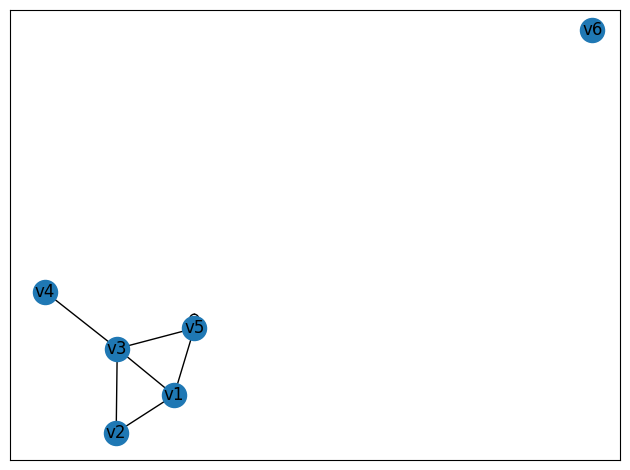

In [3]:
g = nx.Graph(adjacency_list)
plot_graph(g)

**How to store a weighted graph in a adjacency list?**

Just add the weight to each edge-entry!
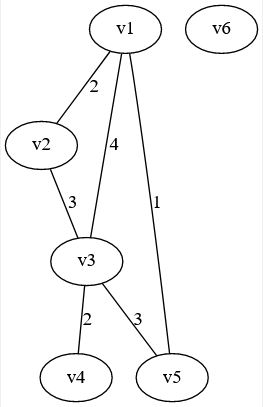

In [4]:
adjacency_list_weighted = {
    "v1": [("v2", 2), ("v3", 4), ("v5", 1)],
    "v2": [("v1", 2), ("v3", 3)],
    "v3": [("v1", 4), ("v2", 3), ("v4", 2), ("v5", 3)],
    "v4": [("v3", 2)],
    "v5": [("v1", 1), ("v3", 3)],
    "v6": [],
}

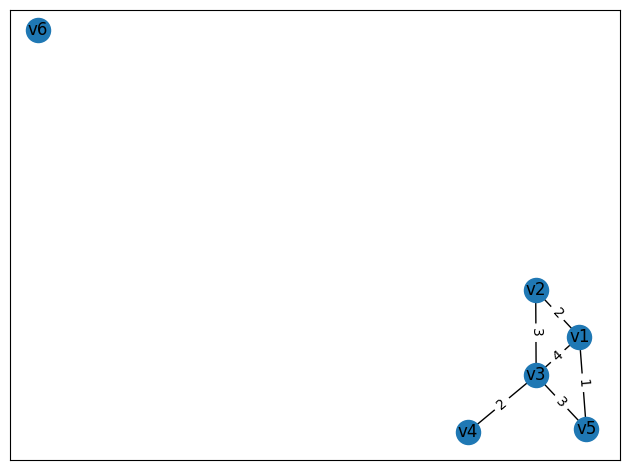

In [5]:
# NetworkX expects weighted graphs in a slightly different format, so we have to convert our data...
#graph will be plotted in a random shape
g = nx.Graph(
    {#gibt jeweiligen knoten mit gewicht und bezeichnung zurück
        node: {edge[0]: {"weight": edge[1], "label": edge[1]} for edge in edges} #edges: keine Variable, sondern Programmteil Kanten
        for node, edges in adjacency_list_weighted.items() #iteriert mit zuvor eingegebenem befehlt über das selbst erstellte dictionary
    }
)
plot_graph(g)

### Adjacency matrix

A adjacency matrix is a |V|×|V|
matrix that represents a graph G by assigning each column and row to one node v∈V.

Each entry in the matrix represents a possible edge.
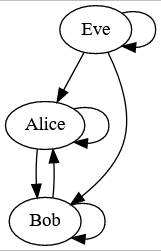
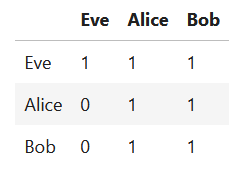

### Graph analysis: Node importance

Often graph data is structured such that nodes represent entities (characters, websites, ...) and edges represent relations between entities (co-occurrence, links, ...)

The most simple form to analyze graph data is searching for those entities which are well connected.

There are multiple ways to measure node importance:
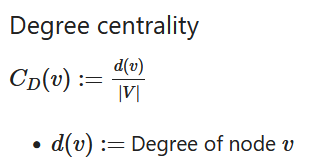

**Degree of a node**

The degree of a node v in an undirected graph Gu is the number of edges that start or end in v

d(v)=|{{u,w}∈E∣u=v∨u=w}|(Loops count twice)

If the graph is directed Gd

then we can distinguish between in the in-degree, and out-degree:

- di(v)=|{(u,w)∈E|v=w}|
- do(v)=|{(u,w)∈E|v=u}|

=> d(v)=div+do(v)

The degree-centrality favors nodes that have many connections to other nodes.

**Closeness centrality**
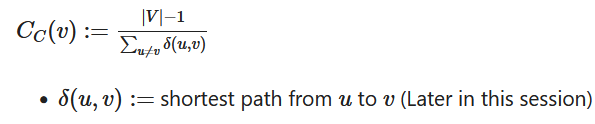

The closeness-centrality favors nodes with a short distance to all other nodes in the graph.

**Betweeness centrality**
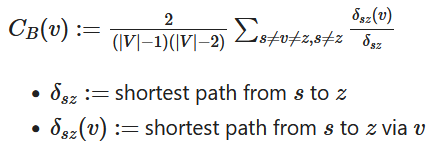

The Betweeness-centrality favors nodes often lie witihn the shortest path between any two other nodes in the graph.

**Graph: Shortest distance - Dijkstra's Algorithm**
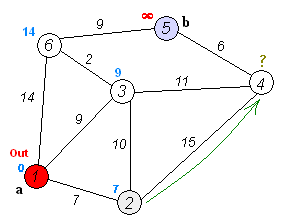

As we've seen, we need to compute the shortest path between two nodes to be able to compute all measures of centrality.

The shortest path is also very important for various other applications.

To compute, the shortest path between two nodes in a graph, we can use several the Dijkstra-Algorithm.
Weiteres Code-Beispiel hier: https://www.geeksforgeeks.org/python-program-for-dijkstras-shortest-path-algorithm-greedy-algo-7/

In [6]:
from typing import Dict
from collections import OrderedDict

def dijkstra(graph: Dict[str, Dict[str, int]], start: str, verbose: bool = False):
    # Mark all nodes as unvisited
    unvisited_nodes = set(graph.keys())
    # Set distances to all nodes except start to infinity
    distances = {n: float("inf") if n != start else 0 for n in unvisited_nodes}
    shortest_paths = OrderedDict()
    # Iterate over all nodes.
    if verbose:
        print(f"Running Dijkstra-algorithm to find the shortest paths from '{start}' to all other nodes")
        graph_as_dicts = {node: {neighbor: {"label": weight} for neighbor, weight in neighbors.items()} for node, neighbors in graph.items()}
        plot_graph(nx.DiGraph(graph_as_dicts))
    while unvisited_nodes:
        current_node = next(iter(sorted(unvisited_nodes, key=distances.get)))
        if verbose: print(f"Current-Node is '{current_node}'. Current distance from '{current_node}' to '{start}' is {distances[current_node]}")
        for neighbor, distance in graph[current_node].items():
            if verbose: print(f"Checking neighbor '{neighbor}' of current node '{current_node}'")
            old_distance = distances[neighbor]
            new_distance = distances[current_node] + distance
            if verbose:
                print(
                    f"Old distance to '{neighbor}'= {old_distance}; New distance to {neighbor} via '{current_node}'={new_distance}"
                )
            if old_distance > new_distance:
                distances[neighbor] = new_distance
                shortest_paths[neighbor] = current_node
                if verbose: print(f"Setting distance to '{neighbor}' via '{current_node}' as new minimal distance")
        unvisited_nodes.discard(current_node)
        if verbose: print(f"Finished checking all neighbors of '{current_node}'; marking it as visited")
    
    # The algorithm is finished, but we also decode the shortest paths into a more readable format
    decoded_shortest_paths = []
    for to_node, from_node in shortest_paths.items():
        if from_node == start:
            decoded_shortest_paths.append([from_node, to_node])
        else:
            path = [to_node, from_node]
            while True:
                from_node = shortest_paths[from_node]
                path.append(from_node)
                if from_node == start:
                    break
            decoded_shortest_paths.append(path[::-1])
    return distances, decoded_shortest_paths

Running Dijkstra-algorithm to find the shortest paths from 'a' to all other nodes


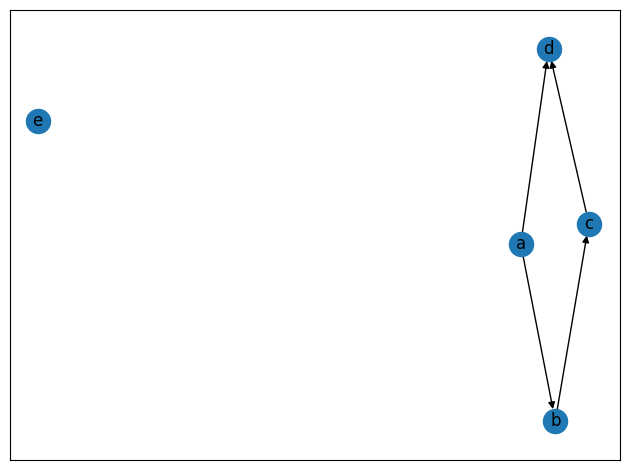

Current-Node is 'a'. Current distance from 'a' to 'a' is 0
Checking neighbor 'b' of current node 'a'
Old distance to 'b'= inf; New distance to b via 'a'=1
Setting distance to 'b' via 'a' as new minimal distance
Checking neighbor 'd' of current node 'a'
Old distance to 'd'= inf; New distance to d via 'a'=4
Setting distance to 'd' via 'a' as new minimal distance
Finished checking all neighbors of 'a'; marking it as visited
Current-Node is 'b'. Current distance from 'b' to 'a' is 1
Checking neighbor 'c' of current node 'b'
Old distance to 'c'= inf; New distance to c via 'b'=2
Setting distance to 'c' via 'b' as new minimal distance
Finished checking all neighbors of 'b'; marking it as visited
Current-Node is 'c'. Current distance from 'c' to 'a' is 2
Checking neighbor 'd' of current node 'c'
Old distance to 'd'= 4; New distance to d via 'c'=3
Setting distance to 'd' via 'c' as new minimal distance
Finished checking all neighbors of 'c'; marking it as visited
Current-Node is 'd'. Current di

({'a': 0, 'b': 1, 'd': 3, 'e': inf, 'c': 2},
 [['a', 'b'], ['a', 'b', 'c', 'd'], ['a', 'b', 'c']])

In [12]:
graph = {
    "a": {"b": 1, "d": 4},
    "b": {"c": 1},
    "c": {"d": 1},
    "d": {},
    "e": {}
}

dijkstra(graph=graph, start="a", verbose=True) #verbose sorgt erst dafür, dass der graph auch gezeichnet wird

Running Dijkstra-algorithm to find the shortest paths from '2' to all other nodes


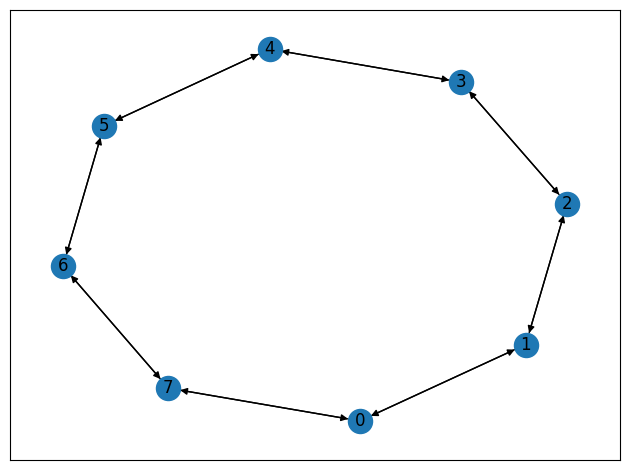

Current-Node is '2'. Current distance from '2' to '2' is 0
Checking neighbor '1' of current node '2'
Old distance to '1'= inf; New distance to 1 via '2'=1
Setting distance to '1' via '2' as new minimal distance
Checking neighbor '3' of current node '2'
Old distance to '3'= inf; New distance to 3 via '2'=1
Setting distance to '3' via '2' as new minimal distance
Finished checking all neighbors of '2'; marking it as visited
Current-Node is '1'. Current distance from '1' to '2' is 1
Checking neighbor '0' of current node '1'
Old distance to '0'= inf; New distance to 0 via '1'=2
Setting distance to '0' via '1' as new minimal distance
Checking neighbor '2' of current node '1'
Old distance to '2'= 0; New distance to 2 via '1'=2
Finished checking all neighbors of '1'; marking it as visited
Current-Node is '3'. Current distance from '3' to '2' is 1
Checking neighbor '2' of current node '3'
Old distance to '2'= 0; New distance to 2 via '3'=2
Checking neighbor '4' of current node '3'
Old distance 

({0: 2, 1: 1, 2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 3},
 [[2, 1],
  [2, 3],
  [2, 1, 0],
  [2, 3, 4],
  [2, 1, 0, 7],
  [2, 3, 4, 5],
  [2, 3, 4, 5, 6]])

In [15]:
# Run dijkstra on more complex randomly generated graph
nx_graph = nx.cycle_graph(8)
g = nx.to_dict_of_dicts(nx_graph, edge_data=1)
dijkstra(g, start=2, verbose=True)

### NetworkX: Working with graphs in Python

'NetworkX' is the most popular, widely applicable and commonly used library for working with graphs in Python.

**Installation and usage**

$ pip install networkx

As often, there is a convention on how to import 'NetworkX':

import networkx as nx

#### Creating graphs

We have several options to create graphs in 'NetworkX'.
Creating graphs from scratch

First and foremost, 'NetworkX' differentiates graphs into two categories:


In [16]:
# Undirected graphs
undirected_graph = nx.Graph()

# Directed graphs
directed_graph = nx.DiGraph()

By default, an freshly initialized graph is empty...

...To add nodes and edges we can use the corresponding methods

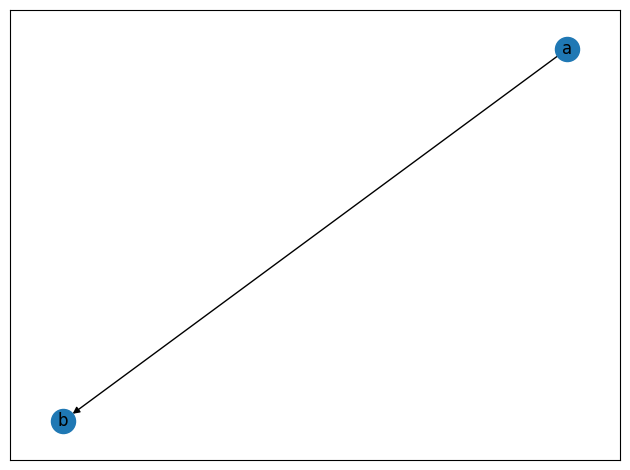

In [17]:
directed_graph.add_node("a")
directed_graph.add_node("b")
directed_graph.add_edge("a", "b")
plot_graph(directed_graph)

To make our lives a little bit easier, we can also use methods that add multiple nodes or edges at once:

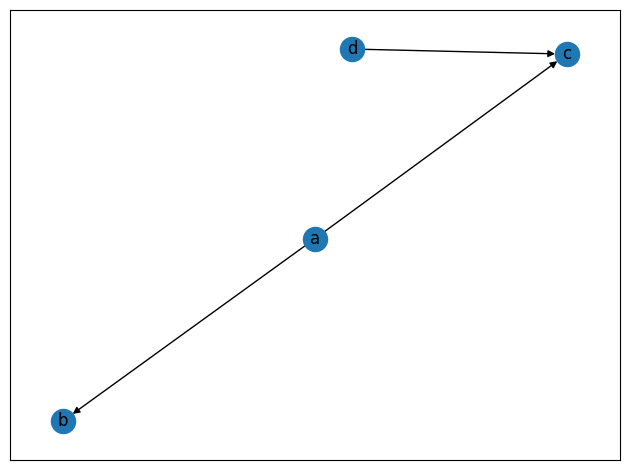

In [18]:
directed_graph.add_nodes_from(["c", "d"]) #add nodes
directed_graph.add_edges_from([("a", "c"), ("d", "c")]) #defines the edges of the newly added nodes
plot_graph(directed_graph)

### Creating graphs from other data-structures

As we've already seen above, we can also initialize nxGraphs from various other data-structures.

Most notably, we can create a graph from an existing adjacency list:


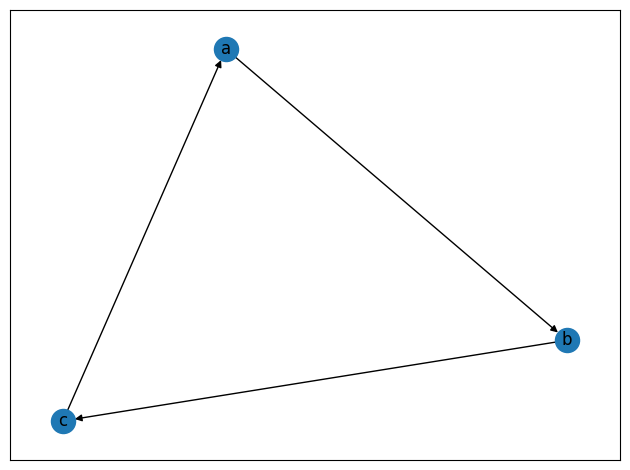

In [21]:
adjacency_list = {
    "a": ["b"],
    "b": ["c"],
    "c": ["a"]
}
graph_a = nx.DiGraph(adjacency_list)
plot_graph(graph_a)

Or from an adjacency matrix:

In [22]:
import pandas as pd

adjacency_matrix = pd.DataFrame([
        [1, 1, 1],
        [0, 1, 0],
        [0, 0, 0.5]
    ],
    columns=["a", "b", "c"],
    index=["a", "b", "c"]
)
adjacency_matrix

a  b    c
a  1  1  1.0
b  0  1  0.0
c  0  0  0.5

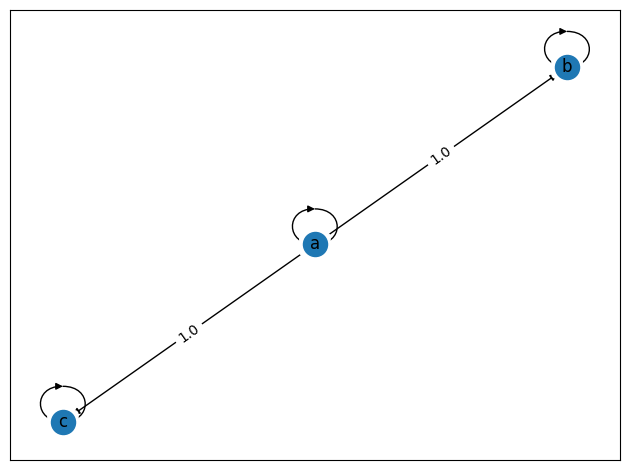

{'weight': 1.0, 'label': 1.0}

In [30]:
graph_b = nx.from_pandas_adjacency(adjacency_matrix, create_using=nx.DiGraph) #from pandas necessary, because we have a pandas df
plot_graph(graph_b)
graph_b.edges[("a", "b")]

### Assigning metadata and weights to graphs

A nx.(Di)Graph object offers attributes to access nodes and edges directly:


In [24]:
graph_b.edges[("a", "c")], graph_b.edges[("c", "c")]

({'weight': 1.0, 'label': 1.0}, {'weight': 0.5, 'label': 0.5})

As we can see here, nx.from_pandas_adjacency automatically interprets the matrix entries as weights.

These weights (nodes, edges) are stored in a dictionary assigned to their corresponding object.

To add other metadata, we can also add entries to these dictionaries:

In [25]:
graph_b.nodes["a"]["meta_character_name"] = "Zelda"
graph_b.nodes["a"]

{'meta_character_name': 'Zelda'}

This way, we can also add weights to existing graphs post-hoc:

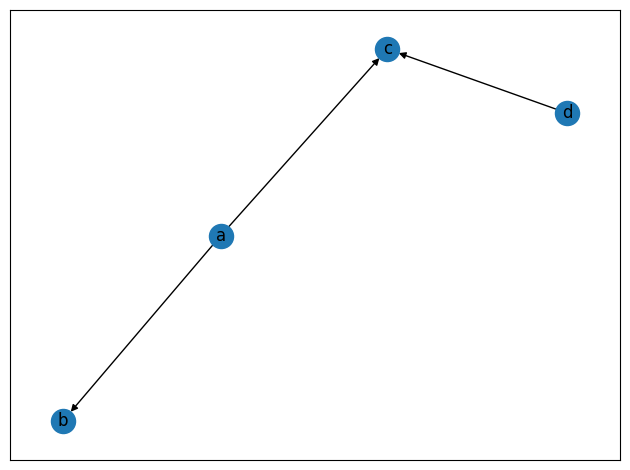

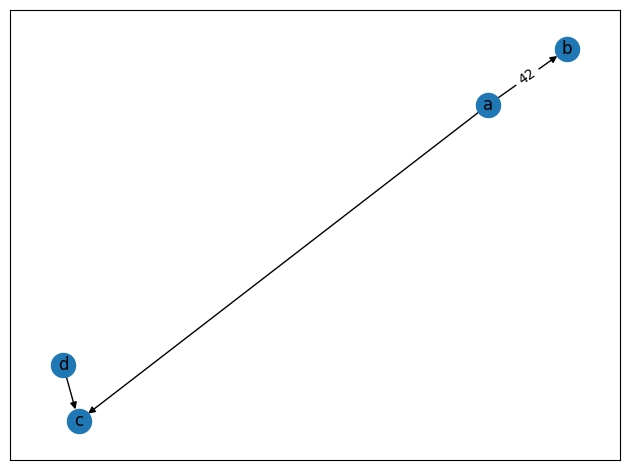

In [26]:
plot_graph(directed_graph) #single graph
directed_graph.edges[("a", "b")]["weight"] = 42 #add weight to a and b
plot_graph(directed_graph)

### Visualizing graphs

The most striking feature of NetworkX is its ability to visualize graphs with just a few lines of code.

By default, NetworkX uses matplotlib to create plots. You can use the nx.draw method for that:


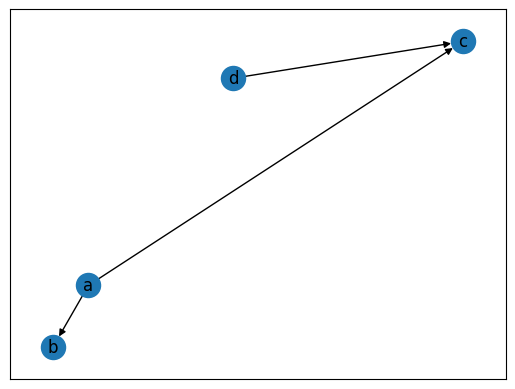

In [27]:
nx.draw_networkx(directed_graph)

Unfortunately, NetworkX doesn't recognize edge-weights automatically, so we have to add them manually to the plots:

{('a', 'b'): Text(0.04750589124152674, -0.7742987571095986, '42')}

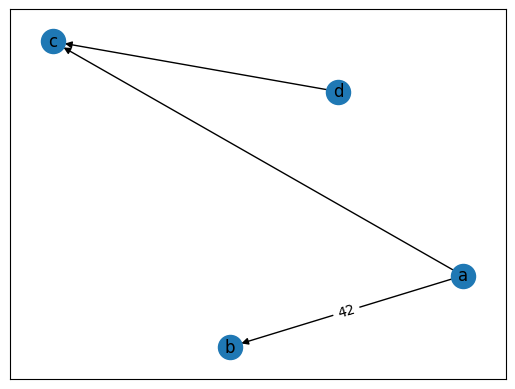

In [36]:
pos = nx.spring_layout(directed_graph)
nx.draw_networkx(directed_graph, pos=pos)
labels = nx.get_edge_attributes(directed_graph, "weight")
nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=labels)

#### Addendum: Beware of graph visualization

As you can see above, we had to define a fixed layout for our graph visualization to inject the edge-labels.

This is because graphs naturally do not specify any spatial information that could guide us while visualizing it.

To do this, we (or NetworkX) use an algorithm to automatically infer a suitable way of visualizing graphs.

These algorithms use specific rules on how nodes and edges are drawn and thus may induce a bias in the visualization.

For example, we might use an algorithm that positions two nodes together, leading the observer to (unconsciously) assume that these nodes are similar in some regard.

But this is not guaranteed!

Graph visualization is a field of research on its own, and we won't dig further into it. But be beware of these implications, and always try out different layout-algorithms and cautiously compare the results!

Fortunately, NetworkX's matplotlib backend offers many different drawing algorithms, so you can quickly try them out.

#### Analyzing graphs

NetworkX also offers an extensive set of graph algorithms that helps us analyze specific properties or patterns within our graph data.

These include, the measures of centrality we've just discussed (+ more), as well as various other tools.

Further reading

You can find the complete set of algorithms in the documentation.
https://networkx.org/documentation/stable/reference/algorithms/index.html

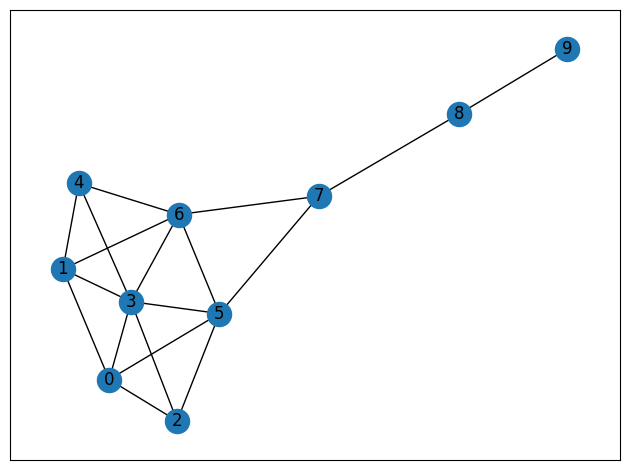

In [37]:
kite_graph = nx.krackhardt_kite_graph()
plot_graph(kite_graph)

In [38]:
nx.centrality.degree_centrality(kite_graph)
#degree centrality:
#measure of number of connections each node has in the network
#the most central node is directly connected to n other nodes

{0: 0.4444444444444444,
 1: 0.4444444444444444,
 2: 0.3333333333333333,
 3: 0.6666666666666666,
 4: 0.3333333333333333,
 5: 0.5555555555555556,
 6: 0.5555555555555556,
 7: 0.3333333333333333,
 8: 0.2222222222222222,
 9: 0.1111111111111111}

In [ ]:
nx.centrality.betweenness_centrality(kite_graph)
#betweenness centrality:
#measure of how often a node lies in the shortest path between 
#two other nodes in the network

In [ ]:
nx.centrality.closeness_centrality(kite_graph)
#closeness centrality:
#measure of closeness or distance to others in the network
#more central nodes have low closeness centrality scores and do not have to travel as far alont paths to get to the others in the network
#nodes with high closeness centrality scores are less central and have to travel farther alont the path to get to the other in the network

In [ ]:
nx.dijkstra_path(kite_graph, y)

In [ ]:
dict(nx.all_pairs_dijkstra(kite_graph))

## Project: Analyze character constellations in a Drama of your choice

For your project, you will pick a play, from the DraCor-Repository.

It contains TEI-annotated plays in various languages and graph-data describing character co-occurrences and their relations.

Your task is to pick a drama, and use the techniques we just learned to visualize the data and describe some basic properties, like the most important characters and their relations. Also feel free to search for other ways how to investigate graph data! 🙂 Some interesting keywords to google could be (but are not limited to): "cliques" or "small-world networks".

Also, remember that DraCor offers not only the network-data itself but also the text in TEI-format, enabling you to gather additional features for your analysis.

If you want additional resources on analyzing and visualizing these networks using Gephi, another popular tool for investigating networks, you can use this tutorial.

To get started

1. Go to the DraCor main page
2. Choose a language
3. Choose a play and click on its title (The website also provides you with some basic stats and visualizations of the networks, both are useful to estimate if the networks are interesting)
4. Go to the Download section and download both the co-occurrence- and relation-network as GraphML file.
5. Use networkX to load the data.



In [ ]:
g = nx.read_graphml("/Users/lennartkeller/Downloads/ger000173-krueger-die-geistlichen-auf-dem-lande.graphml")
plot_graph(g)